In [65]:
import json
import glob
import pandas as pd

def load_results(results_dir,output_index=0):
    records = []
    for fn in glob.glob(f"{results_dir}/*.json"):
        with open(fn, "r") as f:
            r = json.load(f)

        base = {
            "seed": r["seed"],
            "n_train": r["n_train"],
            "n_test": r["n_test"],
            "train_time": r["timing_sec"]["train"],
            "infer_time": r["timing_sec"]["infer"],
            "infer_ms_per_sample": r["timing_sec"]["infer_per_sample_ms"],
            "cpu_rss_peak_mb": r["peak_memory"]["cpu_rss_peak_mb"],
            "model_size_mb": r["model_size"]["checkpoint_mb"],
        }

        # aggregated metrics
        # for k, v in r["metrics"].items():
        #     if k.endswith("_mean"):
        #         base[k] = v

        base["rmse_mean"]    = r["metrics"]["rmse"][output_index]
        base["rrmse_mean"]   = r["metrics"]["rrmse"][output_index]
        base["mae_mean"]     = r["metrics"]["mae"][output_index]
        base["r2_mean"]      = r["metrics"]["r2"][output_index]
        base["p95_abs"] = r["metrics"]["p95_abs"][output_index]
        base["max_abs"] = r["metrics"]["max_abs"][output_index]

        records.append(base)

    return pd.DataFrame(records)


df_nn = load_results("./neural_network/nn_results",output_index=1)
df_nn.sort_values(["n_train", "seed"], inplace=True)
df_nn.head()

agg_nn = (
    df_nn
    .groupby("n_train")
    .agg(
        rrmse_mean_mean=("rrmse_mean", "mean"),
        rrmse_mean_std =("rrmse_mean", "std"),
        r2_mean_mean   =("r2_mean", "mean"),
        r2_mean_std    =("r2_mean", "std"),
        train_time_mean=("train_time", "mean"),
        train_time_std =("train_time", "std"),
        infer_time_mean  =("infer_time", "mean"),
        infer_time_std  =("infer_time", "std"),
        mem_mb_mean    =("cpu_rss_peak_mb", "mean"),
        mem_mb_std    =("cpu_rss_peak_mb", "std"),
        model_size_mb_mean    =("model_size_mb", "mean"),
        model_size_mb_std    =("model_size_mb", "std"),
    )
    .reset_index()
)

agg_nn


,n_train,rrmse_mean_mean,rrmse_mean_std,r2_mean_mean,r2_mean_std,train_time_mean,train_time_std,infer_time_mean,infer_time_std,mem_mb_mean,mem_mb_std,model_size_mb_mean,model_size_mb_std
0,4000,0.054644,0.011127,0.996915,0.001152,78.051652,6.917161,0.008398,0.001118,603.231250,18.348968,0.037663,0.0
1,8000,0.030140,0.006498,0.999058,0.000349,140.689198,7.648111,0.007721,0.000319,605.145313,15.107450,0.037663,0.0
2,12000,0.019475,0.003719,0.999610,0.000139,225.897595,11.682511,0.006831,0.000713,579.828906,83.047755,0.037663,0.0
3,16000,0.014067,0.002330,0.999798,0.000065,267.031128,20.132316,0.006630,0.000742,610.567969,10.112533,0.037663,0.0
4,20000,0.011076,0.001619,0.999875,0.000036,357.027815,18.443095,0.008820,0.002610,610.149219,20.560941,0.037663,0.0
5,24000,0.009351,0.001123,0.999912,0.000021,388.980735,27.774968,0.006557,0.000598,609.351562,14.083000,0.037663,0.0


In [66]:
import json
import glob
import pandas as pd

def load_gp_results(results_dir,output_index=0):
    records = []

    for fn in glob.glob(f"{results_dir}/*.json"):
        with open(fn, "r") as f:
            r = json.load(f)

        base = {
            "seed": r["seed"],
            "n_train": r["n_train"],
            "n_test": r["n_test"],
            "train_time": r["timing_sec"]["train"],
            "infer_time": r["timing_sec"].get("infer", 0.0),
            "cpu_rss_peak_mb": r["peak_memory"]["cpu_rss_peak_mb"],
            "model_size_mb": r["model_size"]["K_train_mb"],
        }

        # aggregated metrics (same names as NN)
        # for k, v in r["metrics"].items():
        #     if k.endswith("_mean"):
        #         base[k] = v
        base["rmse_mean"]    = r["metrics"]["rmse"][output_index]
        base["rrmse_mean"]   = r["metrics"]["rrmse"][output_index]
        base["mae_mean"]     = r["metrics"]["mae"][output_index]
        base["r2_mean"]      = r["metrics"]["r2"][output_index]
        base["p95_abs"] = r["metrics"]["p95_abs"][output_index]
        base["max_abs"] = r["metrics"]["max_abs"][output_index]

        records.append(base)

    df = pd.DataFrame(records)
    return df

df_gp = load_gp_results("./gaussian_process/gp_results",output_index=1)
df_gp.sort_values(["n_train", "seed"], inplace=True)
df_gp.head()

agg_gp = (
    df_gp
    .groupby("n_train")
    .agg(
        rrmse_mean_mean=("rrmse_mean", "mean"),
        rrmse_mean_std =("rrmse_mean", "std"),
        r2_mean_mean   =("r2_mean", "mean"),
        r2_mean_std    =("r2_mean", "std"),
        train_time_mean=("train_time", "mean"),
        train_time_std =("train_time", "std"),
        infer_time_mean=("infer_time", "mean"),
        infer_time_std =("infer_time", "std"),
        mem_mb_mean    =("cpu_rss_peak_mb", "mean"),
        mem_mb_std     =("cpu_rss_peak_mb", "std"),
        model_size_mb_mean=("model_size_mb", "mean"),
        model_size_mb_std =("model_size_mb", "std"),
    )
    .reset_index()
)

agg_gp



,n_train,rrmse_mean_mean,rrmse_mean_std,r2_mean_mean,r2_mean_std,train_time_mean,train_time_std,infer_time_mean,infer_time_std,mem_mb_mean,mem_mb_std,model_size_mb_mean,model_size_mb_std
0,4000,0.003046,0.001624,0.999989,1.268284e-05,0.797031,0.102985,0.794097,0.167423,1879.339062,14.850966,122.070312,0.0
1,8000,0.000476,0.000192,1.000000,1.956858e-07,4.923792,1.878657,1.431255,0.400642,4092.157031,6.018405,488.281250,0.0
2,12000,0.000166,0.000033,1.000000,1.140513e-08,11.345088,2.205452,2.203722,0.729512,6786.285937,4.437506,1098.632812,0.0
3,16000,0.000110,0.000005,1.000000,1.175721e-09,28.004439,5.915482,2.774270,0.602923,9973.517969,5.646253,1953.125000,0.0
4,20000,0.000100,0.000002,1.000000,4.632261e-10,40.494732,6.176244,3.559846,1.017813,13650.396875,5.369074,3051.757812,0.0
5,24000,0.000097,0.000001,1.000000,2.042256e-10,121.421579,112.676008,4.218917,1.485737,17812.345313,9.385481,4394.531250,0.0


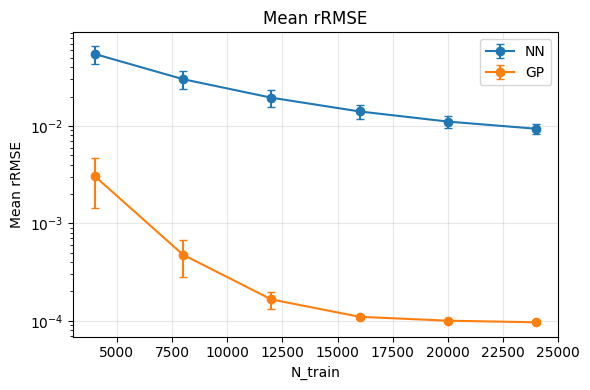

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.errorbar(
    agg_nn["n_train"],
    agg_nn["rrmse_mean_mean"],
    yerr=agg_nn["rrmse_mean_std"],
    marker="o",
    capsize=3,
    label = "NN"
)
plt.errorbar(
    agg_gp["n_train"],
    agg_gp["rrmse_mean_mean"],
    yerr=agg_gp["rrmse_mean_std"],
    marker="o",
    capsize=3,
    label = "GP"
)

# plt.xscale("log")
plt.yscale("log")
plt.xlabel("N_train")
plt.ylabel("Mean rRMSE")
plt.grid(True, alpha=0.3)
plt.title("Mean rRMSE")
plt.tight_layout()
plt.legend()
plt.show()


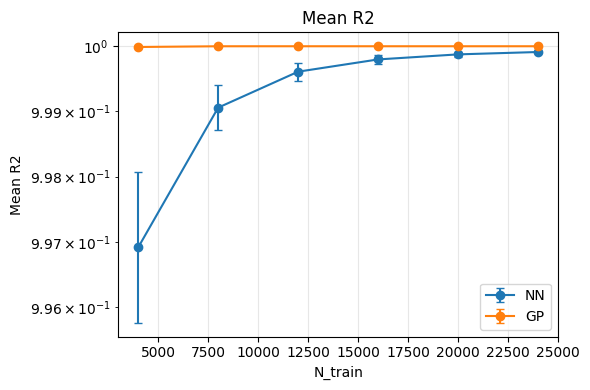

In [68]:
plt.figure(figsize=(6,4))
plt.errorbar(
    agg_nn["n_train"],
    agg_nn["r2_mean_mean"],
    yerr=agg_nn["r2_mean_std"],
    marker="o",
    capsize=3,
    label = "NN"
)
plt.errorbar(
    agg_gp["n_train"],
    agg_gp["r2_mean_mean"],
    yerr=agg_gp["r2_mean_std"],
    marker="o",
    capsize=3,
    label = "GP"
)

# plt.xscale("log")
plt.yscale("log")
plt.xlabel("N_train")
plt.ylabel("Mean R2")
plt.grid(True, alpha=0.3)
plt.title("Mean R2")
plt.tight_layout()
plt.legend()
plt.show()


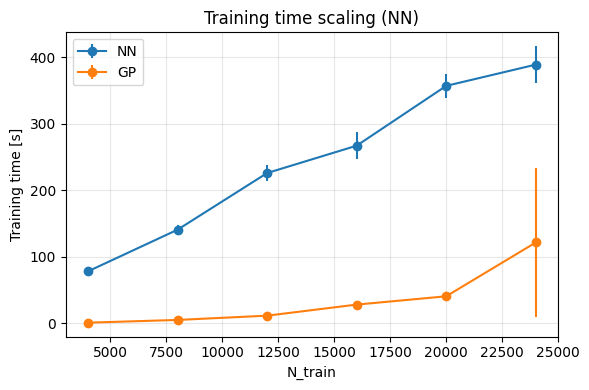

In [69]:
plt.figure(figsize=(6,4))
plt.errorbar(
    agg_nn["n_train"],
    agg_nn["train_time_mean"],
    yerr=agg_nn["train_time_std"],
    marker="o",
    label = "NN"
)

plt.errorbar(
    agg_gp["n_train"],
    agg_gp["train_time_mean"],
    yerr=agg_gp["train_time_std"],
    marker="o",
    label = "GP"
)

# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("N_train")
plt.ylabel("Training time [s]")
plt.grid(True, alpha=0.3)
plt.title("Training time scaling (NN)")
plt.tight_layout()
plt.legend()
plt.show()


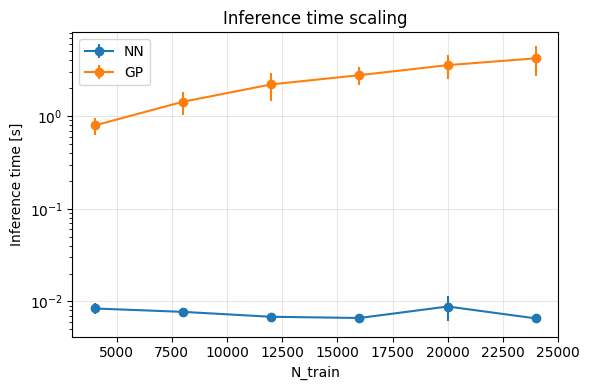

In [73]:
#inference time plot
plt.figure(figsize=(6,4))
plt.errorbar(
    agg_nn["n_train"],
    agg_nn["infer_time_mean"],
    yerr=agg_nn["infer_time_std"],
    marker="o",
    label = "NN"
)
plt.errorbar(
    agg_gp["n_train"],
    agg_gp["infer_time_mean"],
    yerr=agg_gp["infer_time_std"],
    marker="o",
    label = "GP"
)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("N_train")
plt.ylabel("Inference time [s]")
plt.grid(True, alpha=0.3)
plt.title("Inference time scaling")
plt.tight_layout()
plt.legend()
plt.show()

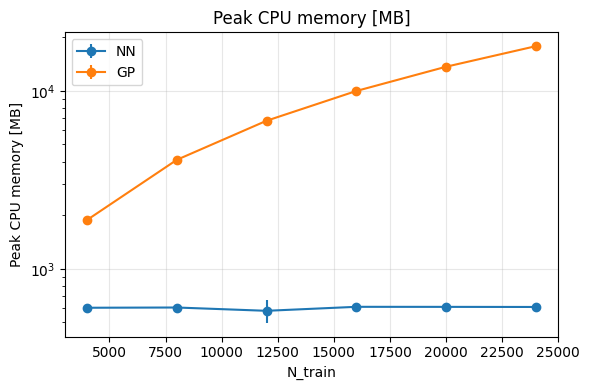

In [71]:
plt.figure(figsize=(6,4))
plt.errorbar(
    agg_nn["n_train"],
    agg_nn["mem_mb_mean"],
    yerr=agg_nn["mem_mb_std"],
    marker="o",
    label = "NN"
)

plt.errorbar(
    agg_gp["n_train"],
    agg_gp["mem_mb_mean"],
    yerr=agg_gp["mem_mb_std"],
    marker="o",
    label = "GP"
)
plt.yscale("log")
plt.xlabel("N_train")
plt.ylabel("Peak CPU memory [MB]")
plt.grid(True, alpha=0.3)
plt.title("Peak CPU memory [MB]")
plt.tight_layout()
plt.legend()
plt.show()


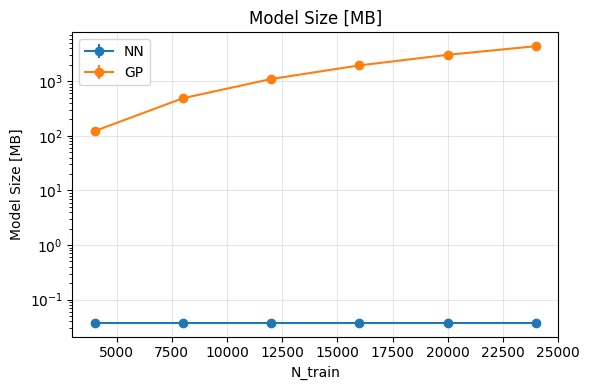

In [72]:
plt.figure(figsize=(6,4))
plt.errorbar(
    agg_nn["n_train"],
    agg_nn["model_size_mb_mean"],
    yerr=agg_nn["model_size_mb_std"],
    marker="o",
    label = "NN"
)

plt.errorbar(
    agg_gp["n_train"],
    agg_gp["model_size_mb_mean"],
    yerr=agg_gp["model_size_mb_std"],
    marker="o",
    label = "GP"
)

plt.yscale("log")
plt.xlabel("N_train")
plt.ylabel("Model Size [MB]")
plt.grid(True, alpha=0.3)
plt.title("Model Size [MB]")
plt.tight_layout()
plt.legend()
plt.show()
